# Data Load and Overview

In [1]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Path of sqlite database
database_path = 'database.sqlite'

# Connecting to SQLite database
conn = sqlite3.connect(database_path)

# List of tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

# Names list of tables
table_names = tables['name'].tolist()

# Converting tables into csv files
for table_name in table_names:
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    # Saving as csv
    csv_path = f"./{table_name}.csv"
    df.to_csv(csv_path, index=False)
    print(f"Tablo '{table_name}' CSV olarak kaydedildi: {csv_path}")

conn.close()


Tablo 'sqlite_sequence' CSV olarak kaydedildi: ./sqlite_sequence.csv
Tablo 'Player_Attributes' CSV olarak kaydedildi: ./Player_Attributes.csv
Tablo 'Player' CSV olarak kaydedildi: ./Player.csv
Tablo 'Match' CSV olarak kaydedildi: ./Match.csv
Tablo 'League' CSV olarak kaydedildi: ./League.csv
Tablo 'Country' CSV olarak kaydedildi: ./Country.csv
Tablo 'Team' CSV olarak kaydedildi: ./Team.csv
Tablo 'Team_Attributes' CSV olarak kaydedildi: ./Team_Attributes.csv


In [4]:
# Loading csv files
player_df = pd.read_csv('Player.csv')
player_attributes_df = pd.read_csv('Player_Attributes.csv')
team_df = pd.read_csv('Team.csv')
team_attributes_df = pd.read_csv('Team_Attributes.csv')
match_df = pd.read_csv('Match.csv')
country_df = pd.read_csv('Country.csv')
league_df = pd.read_csv('League.csv')


In [5]:
# print basic information
def basic_info(data_set):
    print(f"This dataset contain/s {data_set.shape[0]} row/s and {data_set.shape[1]} column/s.")
    
    print("\nCount of missing values for each feature:\n")
    display(data_set.isnull().sum())

def stats_and_overview(data_set):
    # summary statistics for features
    display(data_set.describe())
    
    # overview of the dataset structure.
    display(data_set.head())

### Country stats and overview

In [6]:
basic_info(country_df)

This dataset contain/s 11 row/s and 2 column/s.

Count of missing values for each feature:



id      0
name    0
dtype: int64

In [7]:
stats_and_overview(country_df)

,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


### League stats and overview

In [8]:
basic_info(league_df)

This dataset contain/s 11 row/s and 3 column/s.

Count of missing values for each feature:



id            0
country_id    0
name          0
dtype: int64

In [9]:
stats_and_overview(league_df)

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


### Match stats and overview

In [10]:
basic_info(match_df)

This dataset contain/s 25979 row/s and 115 column/s.

Count of missing values for each feature:



id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

In [11]:
stats_and_overview(match_df)

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,24158.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.00000,24147.000000,24147.000000,24147.000000,24146.000000,24146.000000,24140.000000,24158.000000,24158.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.00000,24147.000000,24147.0,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24147.000000,24146.000000,24146.000000,24140.000000,24755.000000,24664.000000,24698.000000,24656.000000,24663.000000,24654.000000,24752.000000,24670.000000,24706.000000,24543.000000,24424.000000,24745.000000,24701.000000,24686.000000,24658.000000,24644.000000,24666.000000,24744.000000,24638.000000,24651.000000,24538.000000,24425.000000,22592.000000,22592.000000,22592.000000,22575.000000,22575.000000,22575.000000,22520.000000,22520.000000,22520.000000,22556.000000,22556.000000,22556.000000,11168.000000,11168.000000,11168.000000,22571.000000,22571.000000,22571.000000,17097.000000,17097.000000,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,2.073516,4.061001,6.049199,7.544871,3.185158,4.769909,5.309604,5.822048,5.389407,5.783244,1.000290,2.074585,4.058558,6.052222,7.52549,3.195387,4.742660,5.294115,5.807546,5.476187,5.766114,0.999627,2.998634,3.000083,3.000414,3.237214,6.476954,6.672257,7.238953,8.026339,9.218868,10.43699,1.000248,3.0,3.000166,3.000248,3.245124,6.469706,6.680292,7.246366,8.022115,9.161186,10.455178,76638.362432,106854.091996,91601.289457,94540.204494,109527.842071,102308.768516,97287.636918,107290.992947,111131.536914,105612.508373,103413.870660,76628.199879,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.876970,2.628818,3.839684,4.662222,2.559245,3.747597,4.396949,2.467613,3.608932,4.150575,2.536202,3.711740,4.385351,2.816447,4.132324,4.972744,2.578737,3.665295,4.482585,2.566061,3.755879,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,0.387185,0.385973,0.446024,1.609682,1.233609,1.092386,1.687376,1.968550,1.492068,0.759585,0.033438,0.403572,0.387047,0.448413,1.63765,1.284060,1.118226,1.687324,1.957116,1.541351,0.763611,0.024916,0.064003,0.012871,0.028777,0.940481,0.7

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Team stats and overview

In [12]:
basic_info(team_df)

This dataset contain/s 299 row/s and 5 column/s.

Count of missing values for each feature:



id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [13]:
stats_and_overview(team_df)

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


### Team_Attributes stats and overview

In [14]:
basic_info(team_attributes_df)

This dataset contain/s 1458 row/s and 25 column/s.

Count of missing values for each feature:



id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [15]:
stats_and_overview(team_attributes_df)

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### Player stats and overview

In [16]:
basic_info(player_df)

This dataset contain/s 11060 row/s and 7 column/s.

Count of missing values for each feature:



id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [17]:
stats_and_overview(player_df)

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


### Player_Attributes stats and overview

In [18]:
basic_info(player_attributes_df)

This dataset contain/s 183978 row/s and 42 column/s.

Count of missing values for each feature:



id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    6869
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [19]:
stats_and_overview(player_attributes_df)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


# PreProcess

In [20]:
# Veri kümesi listesi
datasets = {
    "Country": country_df,
    "League": league_df,
    "Match": match_df,
    "Player_Attributes": player_attributes_df,
    "Player": player_df,
    "Team_Attributes": team_attributes_df,
    "Team": team_df
}


## 1. Missing Data Analysis and Processing
We detect missing values ​​and fill them in with appropriate methods.
And we check.

In [21]:
match_df.columns.values



array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

In [22]:
# Missing data operations for match dataframe
columns_to_drop_match = [
    "goal", "shoton", "shotoff", "foulcommit", "card", "cross", "corner", "possession",
    'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',  'home_player_X6', 
    'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 
    'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 
    'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 
    'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 
    'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 
    'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',  'away_player_Y8', 'away_player_Y9', 
    'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 
    'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 
    'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
    'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
    "PSH", "PSD", "PSA", "GBH", "GBD", "GBA", "BSH", "BSD", "BSA"
]
match_df.drop(columns=columns_to_drop_match, inplace=True, errors='ignore')

# Delete rows containing missing values ​​in the remaining columns
match_df.dropna(inplace=True)

print(f"match_df size after processing: {match_df.shape}")

# Missing data transactions for Team dataframe
team_df.dropna(subset=["team_fifa_api_id"], inplace=True)
print(f"team_df size after processing: {team_df.shape}")

# Missing data operations for Team_Attributes dataframe
team_attributes_df.drop(columns=["buildUpPlayDribbling"], inplace=True, errors='ignore')
print(f"team_attributes_df size after processing: {team_attributes_df.shape}")

# Missing data handling for Player_Attributes dataframe
columns_to_drop_player_attributes = [
    "attacking_work_rate", "volleys", "curve", "agility", 
    "balance", "jumping", "vision", "sliding_tackle"
]
player_attributes_df.drop(columns=columns_to_drop_player_attributes, inplace=True, errors='ignore')

# Player_Attributes delete rows with missing values ​​in other columns in the dataframePlayer_Attributes delete rows with missing values ​​in other columns in the dataframe
player_attributes_df.dropna(inplace=True)

print(f"player_attributes_df size after processing: {player_attributes_df.shape}")


match_df size after processing: (16980, 32)
team_df size after processing: (288, 5)
team_attributes_df size after processing: (1458, 24)
player_attributes_df size after processing: (183142, 34)


## 2. Control of Data Formats
If there are date columns, they are converted to datetime format.


In [23]:
# Veri formatlarının kontrolü
for name, df in datasets.items():
    date_columns = [col for col in df.columns if "date" in col.lower()]
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

## 3. Column adding
kullanacağımız datasetleri düzenliyoruz.
We add match outcome column.


In [24]:
match_df['home'] = (match_df['home_team_goal'] > match_df['away_team_goal']).astype(int)  
match_df['draw'] = (match_df['home_team_goal'] == match_df['away_team_goal']).astype(int)  
match_df['away'] = (match_df['home_team_goal'] < match_df['away_team_goal']).astype(int)  

# match_result column
match_df['match_result'] = match_df.apply(
    lambda row: 1 if row['home'] == 1 else (0 if row['draw'] == 1 else -1),
    axis=1
)


In [25]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,home,draw,away,match_result
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,0,1,0,0
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,0,1,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,0,0,1,-1
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1,0,0,1
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,0,0,1,-1


In [26]:
categorical_columns = ['buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
                       'chanceCreationPassingClass', 'chanceCreationCrossingClass', 'chanceCreationShootingClass', 'chanceCreationPositioningClass',
                       'defencePressureClass', 'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass'
                       ]

In [27]:
team_attributes_df = pd.get_dummies(team_attributes_df, columns=categorical_columns)

In [28]:
team_attributes_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlaySpeedClass_Balanced,buildUpPlaySpeedClass_Fast,buildUpPlaySpeedClass_Slow,buildUpPlayDribblingClass_Little,buildUpPlayDribblingClass_Lots,buildUpPlayDribblingClass_Normal,buildUpPlayPassingClass_Long,buildUpPlayPassingClass_Mixed,buildUpPlayPassingClass_Short,buildUpPlayPositioningClass_Free Form,buildUpPlayPositioningClass_Organised,chanceCreationPassingClass_Normal,chanceCreationPassingClass_Risky,chanceCreationPassingClass_Safe,chanceCreationCrossingClass_Little,chanceCreationCrossingClass_Lots,chanceCreationCrossingClass_Normal,chanceCreationShootingClass_Little,chanceCreationShootingClass_Lots,chanceCreationShootingClass_Normal,chanceCreationPositioningClass_Free Form,chanceCreationPositioningClass_Organised,defencePressureClass_Deep,defencePressureClass_High,defencePressureClass_Medium,defenceAggressionClass_Contain,defenceAggressionClass_Double,defenceAggressionClass_Press,defenceTeamWidthClass_Narrow,defenceTeamWidthClass_Normal,defenceTeamWidthClass_Wide,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap
0,1,434,9930,2010-02-22,60,50,60,65,55,50,55,45,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False
1,2,434,9930,2014-09-19,52,56,54,63,64,47,44,54,True,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False
2,3,434,9930,2015-09-10,47,54,54,63,64,47,44,54,True,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False
3,4,77,8485,2010-02-22,70,70,70,70,70,60,70,70,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,True,False
4,5,77,8485,2011-02-22,47,52,53,48,52,47,47,52,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False


# Logistic Classification

In [29]:

# An example from the dataset
match_df = match_df.sample(frac=0.1, random_state=42)

# Team properties: Sort by date and add next date column
team_attributes_df = team_attributes_df.sort_values(by=['team_api_id', 'date'])
team_attributes_df['next_date'] = team_attributes_df.groupby('team_api_id')['date'].shift(-1)

# Add Team Properties for Home and Away Teams
# Combine home team features
match_df = match_df.merge(
    team_attributes_df,
    left_on='home_team_api_id',
    right_on='team_api_id',
    how='left',
    suffixes=('', '_home')
)
match_df = match_df[
    (match_df['date'] >= match_df['date_home']) &
    (match_df['date'] < match_df['next_date'])
]

# Merge away team properties
match_df = match_df.merge(
    team_attributes_df,
    left_on='away_team_api_id',
    right_on='team_api_id',
    how='left',
    suffixes=('', '_away')
)
match_df = match_df[
    (match_df['date'] >= match_df['date_away']) &
    (match_df['date'] < match_df['next_date'])
]

# Feature Engineering with Betting Odds
bet_columns = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
               'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA']

# Calculate averages of ratios for Home, Draw and Away
home_columns = [col for col in bet_columns if col.endswith('H')]
draw_columns = [col for col in bet_columns if col.endswith('D')]
away_columns = [col for col in bet_columns if col.endswith('A')]

match_df['Home_Avg_bet'] = match_df[home_columns].mean(axis=1)
match_df['Draw_Avg_bet'] = match_df[draw_columns].mean(axis=1)
match_df['Away_Avg_bet'] = match_df[away_columns].mean(axis=1)

# Determine the lowest average rate
match_df['favorite_result'] = match_df[['Home_Avg_bet', 'Draw_Avg_bet', 'Away_Avg_bet']].idxmin(axis=1)

# Probability calculation
match_df['home_win_prob'] = 1 / match_df['Home_Avg_bet']
match_df['draw_prob'] = 1 / match_df['Draw_Avg_bet']
match_df['away_win_prob'] = 1 / match_df['Away_Avg_bet']

# Differences between rates
match_df['home_vs_draw_diff'] = match_df['Home_Avg_bet'] - match_df['Draw_Avg_bet']
match_df['home_vs_away_diff'] = match_df['Home_Avg_bet'] - match_df['Away_Avg_bet']
match_df['draw_vs_away_diff'] = match_df['Draw_Avg_bet'] - match_df['Away_Avg_bet']

# Target variable (1: Home Win, 0: Draw, -1: Away Win)
match_df['match_result'] = match_df.apply(
    lambda row: 1 if row['home_team_goal'] > row['away_team_goal'] else
                (0 if row['home_team_goal'] == row['away_team_goal'] else -1),
    axis=1
)


# Selection of Features
features = [
    'home_win_prob', 'draw_prob', 'away_win_prob',
    'home_vs_draw_diff', 'home_vs_away_diff', 'draw_vs_away_diff',
    'buildUpPlaySpeed',
    'buildUpPlayPassing', 'chanceCreationPassing',
    'chanceCreationCrossing', 'chanceCreationShooting',
    'defencePressure', 'defenceAggression', 'defenceTeamWidth',
    'buildUpPlaySpeedClass_Balanced', 'buildUpPlaySpeedClass_Fast',
    'buildUpPlaySpeedClass_Slow', 'buildUpPlayDribblingClass_Little',
    'buildUpPlayDribblingClass_Lots',
    'buildUpPlayDribblingClass_Normal', 'buildUpPlayPassingClass_Long',
    'buildUpPlayPassingClass_Mixed', 'buildUpPlayPassingClass_Short',
    'buildUpPlayPositioningClass_Free Form',
    'buildUpPlayPositioningClass_Organised',
    'chanceCreationPassingClass_Normal',
    'chanceCreationPassingClass_Risky',
    'chanceCreationPassingClass_Safe',
    'chanceCreationCrossingClass_Little',
    'chanceCreationCrossingClass_Lots',
    'chanceCreationCrossingClass_Normal',
    'chanceCreationShootingClass_Little',
    'chanceCreationShootingClass_Lots',
    'chanceCreationShootingClass_Normal',
    'chanceCreationPositioningClass_Free Form',
    'chanceCreationPositioningClass_Organised',
    'defencePressureClass_Deep', 'defencePressureClass_High',
    'defencePressureClass_Medium', 'defenceAggressionClass_Contain',
    'defenceAggressionClass_Double', 'defenceAggressionClass_Press',
    'defenceTeamWidthClass_Narrow', 'defenceTeamWidthClass_Normal',
    'defenceTeamWidthClass_Wide', 'defenceDefenderLineClass_Cover',
    'defenceDefenderLineClass_Offside Trap',
    'buildUpPlaySpeed_away', 'buildUpPlayPassing_away',
    'chanceCreationPassing_away', 'chanceCreationCrossing_away',
    'chanceCreationShooting_away', 'defencePressure_away',
    'defenceAggression_away', 'defenceTeamWidth_away',
    'buildUpPlaySpeedClass_Balanced_away',
    'buildUpPlaySpeedClass_Fast_away',
    'buildUpPlaySpeedClass_Slow_away',
    'buildUpPlayDribblingClass_Little_away',
    'buildUpPlayDribblingClass_Lots_away',
    'buildUpPlayDribblingClass_Normal_away',
    'buildUpPlayPassingClass_Long_away',
    'buildUpPlayPassingClass_Mixed_away',
    'buildUpPlayPassingClass_Short_away',
    'buildUpPlayPositioningClass_Free Form_away',
    'buildUpPlayPositioningClass_Organised_away',
    'chanceCreationPassingClass_Normal_away',
    'chanceCreationPassingClass_Risky_away',
    'chanceCreationPassingClass_Safe_away',
    'chanceCreationCrossingClass_Little_away',
    'chanceCreationCrossingClass_Lots_away',
    'chanceCreationCrossingClass_Normal_away',
    'chanceCreationShootingClass_Little_away',
    'chanceCreationShootingClass_Lots_away',
    'chanceCreationShootingClass_Normal_away',
    'chanceCreationPositioningClass_Free Form_away',
    'chanceCreationPositioningClass_Organised_away',
    'defencePressureClass_Deep_away', 'defencePressureClass_High_away',
    'defencePressureClass_Medium_away',
    'defenceAggressionClass_Contain_away',
    'defenceAggressionClass_Double_away',
    'defenceAggressionClass_Press_away',
    'defenceTeamWidthClass_Narrow_away',
    'defenceTeamWidthClass_Normal_away',
    'defenceTeamWidthClass_Wide_away',
    'defenceDefenderLineClass_Cover_away',
    'defenceDefenderLineClass_Offside Trap_away'
]

match_df.head()



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,home,draw,away,match_result,id_home,team_fifa_api_id,team_api_id,date_home,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlaySpeedClass_Balanced,buildUpPlaySpeedClass_Fast,buildUpPlaySpeedClass_Slow,buildUpPlayDribblingClass_Little,buildUpPlayDribblingClass_Lots,buildUpPlayDribblingClass_Normal,buildUpPlayPassingClass_Long,buildUpPlayPassingClass_Mixed,buildUpPlayPassingClass_Short,buildUpPlayPositioningClass_Free Form,buildUpPlayPositioningClass_Organised,chanceCreationPassingClass_Normal,chanceCreationPassingClass_Risky,chanceCreationPassingClass_Safe,chanceCreationCrossingClass_Little,chanceCreationCrossingClass_Lots,chanceCreationCrossingClass_Normal,chanceCreationShootingClass_Little,chanceCreationShootingClass_Lots,chanceCreationShootingClass_Normal,chanceCreationPositioningClass_Free Form,chanceCreationPositioningClass_Organised,defencePressureClass_Deep,defencePressureClass_High,defencePressureClass_Medium,defenceAggressionClass_Contain,defenceAggressionClass_Double,defenceAggressionClass_Press,defenceTeamWidthClass_Narrow,defenceTeamWidthClass_Normal,defenceTeamWidthClass_Wide,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap,next_date,id_away,team_fifa_api_id_away,team_api_id_away,date_away,buildUpPlaySpeed_away,buildUpPlayPassing_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away,buildUpPlaySpeedClass_Balanced_away,buildUpPlaySpeedClass_Fast_away,buildUpPlaySpeedClass_Slow_away,buildUpPlayDribblingClass_Little_away,buildUpPlayDribblingClass_Lots_away,buildUpPlayDribblingClass_Normal_away,buildUpPlayPassingClass_Long_away,buildUpPlayPassingClass_Mixed_away,buildUpPlayPassingClass_Short_away,buildUpPlayPositioningClass_Free Form_away,buildUpPlayPositioningClass_Organised_away,chanceCreationPassingClass_Normal_away,chanceCreationPassingClass_Risky_away,chanceCreationPassingClass_Safe_away,chanceCreationCrossingClass_Little_away,chanceCreationCrossingClass_Lots_away,chanceCreationCrossingClass_Normal_away,chanceCreationShootingClass_Little_away,chanceCreationShootingClass_Lots_away,chanceCreationShootingClass_Normal_away,chanceCreationPositioningClass_Free Form_away,chanceCreationPositioningClass_Organised_away,defencePressureClass_Deep_away,defencePressureClass_High_away,defencePressureClass_Medium_away,defenceAggressionClass_Contain_away,defenceAggressionClass_Double_away,defenceAggressionClass_Press_away,defenceTeamWidthClass_Narrow_away,defenceTeamWidthClass_Normal_away,defenceTeamWidthClass_Wide_away,defenceDefenderLineClass_Cover_away,defenceDefenderLineClass_Offside Trap_away,next_date_away,Home_Avg_bet,Draw_Avg_bet,Away_Avg_bet,favorite_result,home_win_prob,draw_prob,away_win_prob,home_vs_draw_diff,home_vs_away_diff,draw_vs_away_diff
0,12114,10257,10257,2012/2013,7,2012-10-07,1287036,9804,8529,0,1,1.85,3.4,4.33,1.87,3.25,4.4,1.9,3.35,3.9,1.83,3.2,3.75,1.85,3.3,4.5,1.91,3.2,4.5,1.95,3.3,4.5,0,0,1,-1,1272.0,54.0,9804.0,2012-02-22,50.0,50.0,50.0,65.0,50.0,35.0,45.0,50.0,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,2013-09-20,261.0,1842.0,8529.0,2010-02-22,40.0,30.0,30.0,35.0,55.0,40.0,55.0,60.0,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,2011-02-22,1.880000,3.285714,4.268571,Home_Avg_bet,0.531915,0.304348,0.234270,-1.405714,-2.388571,-0.982857
1,12114,10257,10257,2012/2013,7,2012-10-07,1287036,9804

In [30]:
match_df.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'home', 'draw', 'away', 'match_result', 'id_home',
       'team_fifa_api_id', 'team_api_id', 'date_home', 'buildUpPlaySpeed',
       'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting',
       'defencePressure', 'defenceAggression', 'defenceTeamWidth',
       'buildUpPlaySpeedClass_Balanced', 'buildUpPlaySpeedClass_Fast',
       'buildUpPlaySpeedClass_Slow', 'buildUpPlayDribblingClass_Little',
       'buildUpPlayDribblingClass_Lots',
       'buildUpPlayDribblingClass_Normal', 'buildUpPlayPassingClass_Long',
       'buildUpPlayPassingClass_Mixed', 'buildUpPlayPassingClass_Short',
       'buildU

In [31]:
X = match_df[features]
y = match_df['match_result']

X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

/var/folders/6r/nm84fnfn347gy9087yzc19zh0000gn/T/ipykernel_99919/4025220307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Confusion Matrix:
 [[102   5  66]
 [ 50  12  64]
 [ 44   8 209]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.52      0.59      0.55       173
           0       0.48      0.10      0.16       126
           1       0.62      0.80      0.70       261

    accuracy                           0.58       560
   macro avg       0.54      0.50      0.47       560
weighted avg       0.56      0.58      0.53       560


Accuracy Score: 0.5767857142857142


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


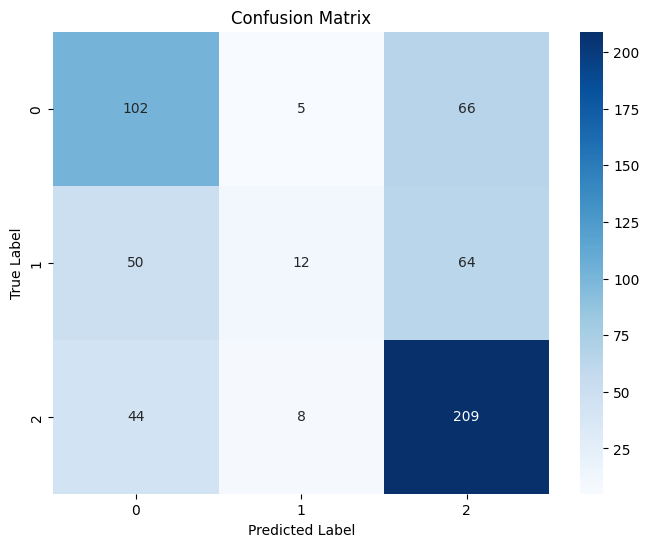

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random forest and LightGBM

In [ ]:
# Sorting the data by date column
match_df['date'] = pd.to_datetime(match_df['date'])
match_df = match_df.sort_values(by='date').reset_index(drop=True)

# Performance calculation function
def calculate_team_performance(match_data):
    """
    The last 5 match information of the teams that have at least 5 match results known before the match date is written. 
    The match results of the teams that have less than 5 matches known are written as many as the number of matches known.
    """
    # Performance dictionary
    team_performance = {}

    def update_performance(team_id, result):
        """
        Updates performance for a specific team.
        """
        if team_id not in team_performance:
            team_performance[team_id] = []
        team_performance[team_id].append(result)
        if len(team_performance[team_id]) > 5:
            team_performance[team_id] = team_performance[team_id][-5:]

    # List to add result columns
    performance_column = []

    for _, row in match_data.iterrows():

        home_team = row['home_team_api_id']
        away_team = row['away_team_api_id']
        home_goals = row['home_team_goal']
        away_goals = row['away_team_goal']

        # Determine the match result
        if home_goals > away_goals:
            home_result, away_result = 'W', 'L'
        elif home_goals < away_goals:
            home_result, away_result = 'L', 'W'
        else:
            home_result, away_result = 'D', 'D'

        # Add performance
        home_perf = ''.join(team_performance.get(home_team, []))
        away_perf = ''.join(team_performance.get(away_team, []))
        performance_column.append((home_perf, away_perf))

        # Update performances
        update_performance(home_team, home_result)
        update_performance(away_team, away_result)

    return performance_column

# Add column by calculating performance
match_df['last_5_home_away'] = calculate_team_performance(match_df)

# Separate home and away performances
match_df[['last_5_home', 'last_5_away']] = pd.DataFrame(
    match_df['last_5_home_away'].tolist(), index=match_df.index
)

# Remove unnecessary column
match_df.drop(columns=['last_5_home_away'], inplace=True)


In [ ]:
# Convert dates to datetime formatn
team_attributes_df['date'] = pd.to_datetime(team_attributes_df['date'])
match_df['date'] = pd.to_datetime(match_df['date'])

# Let's add a column to create transfer date ranges
team_attributes = team_attributes_df.sort_values(by=['team_api_id', 'date'])
team_attributes['next_date'] = team_attributes.groupby('team_api_id')['date'].shift(-1)

# If there is no next date, assume the current date is valid forever
team_attributes['next_date'].fillna(pd.Timestamp.max, inplace=True)

# Let's add the first period for the default transfer period
default_attributes = team_attributes.groupby('team_api_id').first().reset_index()

# Matching function
def get_transfer_attributes(match_row, attributes_df, team_col, default_attrs):
    team_id = match_row[team_col]
    match_date = match_row['date']
    # Find the row where the match date falls on the transfer window
    matching_attrs = attributes_df[
        (attributes_df['team_api_id'] == team_id) &
        (attributes_df['date'] <= match_date) &
        (attributes_df['next_date'] > match_date)
    ]
    if not matching_attrs.empty:
        return matching_attrs.iloc[0].to_dict()  # Return the matching record
    # Return the default value
    default_attr = default_attrs[default_attrs['team_api_id'] == team_id]
    if not default_attr.empty:
        return default_attr.iloc[0].to_dict()
    return {}  # Return null if there is no information for the team

# Get specs for home and away team
home_attributes = match_df.apply(
    get_transfer_attributes, axis=1, args=(team_attributes, 'home_team_api_id', default_attributes))
away_attributes = match_df.apply(
    get_transfer_attributes, axis=1, args=(team_attributes, 'away_team_api_id', default_attributes))

# Properties merged into dataframe
home_attributes_df = pd.DataFrame(list(home_attributes))
away_attributes_df = pd.DataFrame(list(away_attributes))

# Merge with original dataset
combined_data = pd.concat([match_df.reset_index(drop=True), home_attributes_df.add_suffix('_home'), away_attributes_df.add_suffix('_away')], axis=1)

#combined_data.to_csv('fixed_combined_match_attributes.csv', index=False)

In [ ]:
combined_data.isna().sum()

In [ ]:
combined_data.tail(5)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Data Loading
data = combined_data

# Determining the Goal Variable (using home_team_goal and away_team_goal)
data['match_outcome'] = data['home_team_goal'] - data['away_team_goal']
data['match_outcome'] = data['match_outcome'].apply(lambda x: 1 if x > 0 else (2 if x < 0 else 0))  # 1=home win, 2=away win, 0=draw

# Remove Unnecessary Columns to Prevent Data Leakage
data_cleaned = data.drop(columns=['home_team_goal', 'away_team_goal', 'match_outcome', 'home', 'draw', 'away'], errors='ignore')

# Selecting Numerical and Complete Features
pre_match_features = data_cleaned.select_dtypes(include='number').fillna(0)
y_target = data['match_outcome']

# Splitting the Dataset for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
    pre_match_features, y_target, test_size=0.3, random_state=42, stratify=y_target
)

# Training a Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predicting and Performance Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Feature Importance Analysis
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by Importance

# Visualize Top 10 Features
top_features = [(pre_match_features.columns[i], importances[i]) for i in indices[:30]]

plt.figure(figsize=(18, 6))
plt.title("Feature Importances")
plt.bar(range(len(top_features)), [imp[1] for imp in top_features], align="center")
plt.xticks(range(len(top_features)), [imp[0] for imp in top_features], rotation=45)
plt.tight_layout()
plt.show()


# Print Top 10 Features 
print("Top Features:", top_features)




In [ ]:
data_cleaned.tail()

In [ ]:
# 1. Yeni Özellikleri Hesaplama
data['point_difference'] = data['home_points'] - data['away_points']
data['win_rate_difference'] = data['home_win_rate'] - data['away_win_rate']

# 2. Kullanılacak Özellikler
selected_features = [
    'buildUpPlaySpeed_home', 'buildUpPlayPassing_home', 'chanceCreationPassing_home',
    'chanceCreationCrossing_home', 'chanceCreationShooting_home', 'defencePressure_home',
    'defenceAggression_home', 'defenceTeamWidth_home',
    'buildUpPlaySpeed_away', 'buildUpPlayPassing_away', 'chanceCreationPassing_away',
    'chanceCreationCrossing_away', 'chanceCreationShooting_away', 'defencePressure_away',
    'defenceAggression_away', 'defenceTeamWidth_away',
    'home_points', 'home_win_rate', 'away_points', 'away_win_rate',
    'point_difference', 'win_rate_difference'
]

# 3. X ve y Tanımları
X = data[selected_features].fillna(0)  # Eksik değerleri sıfırla dolduruyoruz
y = data['match_outcome']  # Tahmin edeceğimiz sonuç: maç sonucu

# 4. SMOTE ile Dengeleme
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# 5. Veriyi Eğitim ve Test Setine Bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

# 6. Model: LightGBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train, y_train)

# 7. Performans Değerlendirme
from sklearn.metrics import accuracy_score, classification_report
y_pred = lgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# 1. Bahis Oranları ve Gerçek Sonuçlar
# Her bahis şirketi için oranlar (ev sahibi, beraberlik, deplasman)
betting_companies = {
    'B365': ['B365H', 'B365D', 'B365A'],
    'BW': ['BWH', 'BWD', 'BWA'],
    'VC': ['VCH', 'VCD', 'VCA'],
    'WH': ['WHH', 'WHD', 'WHA'],
    'IW': ['IWH', 'IWD', 'IWA'],
    'LB': ['LBH', 'LBD', 'LBA'],
    'SJ': ['SJH', 'SJD', 'SJA']
}

results = []

# 2. Her Bahis Şirketi için Tahmin Gücü Ölçümü
for company, odds in betting_companies.items():
    # Ev sahibi, beraberlik, deplasman oranları
    home_odds, draw_odds, away_odds = odds

    # Tahmin: En düşük oran (favori tahmin)
    data[f'{company}_prediction'] = data[[home_odds, draw_odds, away_odds]].idxmin(axis=1)

    # Tahmini Sonuç (0, 1, 2 formatına çevriliyor)
    prediction_map = {home_odds: 1, draw_odds: 2, away_odds: 0}
    data[f'{company}_prediction'] = data[f'{company}_prediction'].map(prediction_map)

    # Performans Metrikleri
    from sklearn.metrics import accuracy_score, classification_report
    accuracy = accuracy_score(data['match_outcome'], data[f'{company}_prediction'])
    report = classification_report(data['match_outcome'], data[f'{company}_prediction'], output_dict=True)

    results.append({
        'Company': company,
        'Accuracy': accuracy,
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'Precision (2)': report['2']['precision'],
        'Recall (2)': report['2']['recall']
    })

# 3. Sonuçları DataFrame Olarak Sunma
import pandas as pd
results_df = pd.DataFrame(results)


# En iyi tahmin gücüne sahip bahis şirketlerini sıralayalım
#results_df = results_df.sort_values(by='Accuracy', ascending=False)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Bahis Şirketi Tahmin Performansları", dataframe=results_df)

In [ ]:
results_df